In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
index = np.array([10000, 50000, 100000, 500000, 1000000])

k5 = np.array([
    [0.0287, 0.0776, 0.1241, 0.4745, 0.9995],
    [0.0009, 0.005, 0.0078, 0.0569, 0.1697]
])

k10 = np.array([
    [0.1135, 0.3994, 0.6884, 2.5532, 4.7495],
    [0.0134, 0.0083, 0.012, 0.0837, 0.2235]
])

k15 = np.array([
    [0.4949, 1.9803, 3.4793, 14.012, 28.2238],
    [0.0355, 0.0505, 0.1173, 0.3577, 1.2661]
])

k20 = np.array([
    [1.4874, 6.8742, 12.6809, 54.5139, 109.5462],
    [0.1757, 0.4319, 0.5754, 3.022, 6.677]
])

k25 = np.array([
    [3.6938, 16.9233, 33.9364, 138.9211, 267.4724],
    [0.6858, 1.3338, 1.3992, 11.0062, 28.7557]
])

k30 = np.array([
    [7.4095, 34.3882, 68.2131, 318.9386, 542.6531],
    [1.1142, 3.3236, 3.9092, 30.6884, 51.9643]
])

In [5]:
data = []

for grid_size in [0.01, 0.04, 0.07, 0.1, 0.13, 0.16]:
    data.append([])
    for n in [10000, 50000, 100000, 500000, 1000000]:
        with open(f"../logs/gridShift/N{n}_GS{grid_size:.06f}.csv", "r") as f:
            data[-1].append(np.mean(list(map(lambda line: float(line.strip()), f.readlines()))))

data = np.array(data)
data.shape

(6, 5)

In [8]:
plt.rcParams.update({'font.size': 18, "font.family": "Times New Roman"})

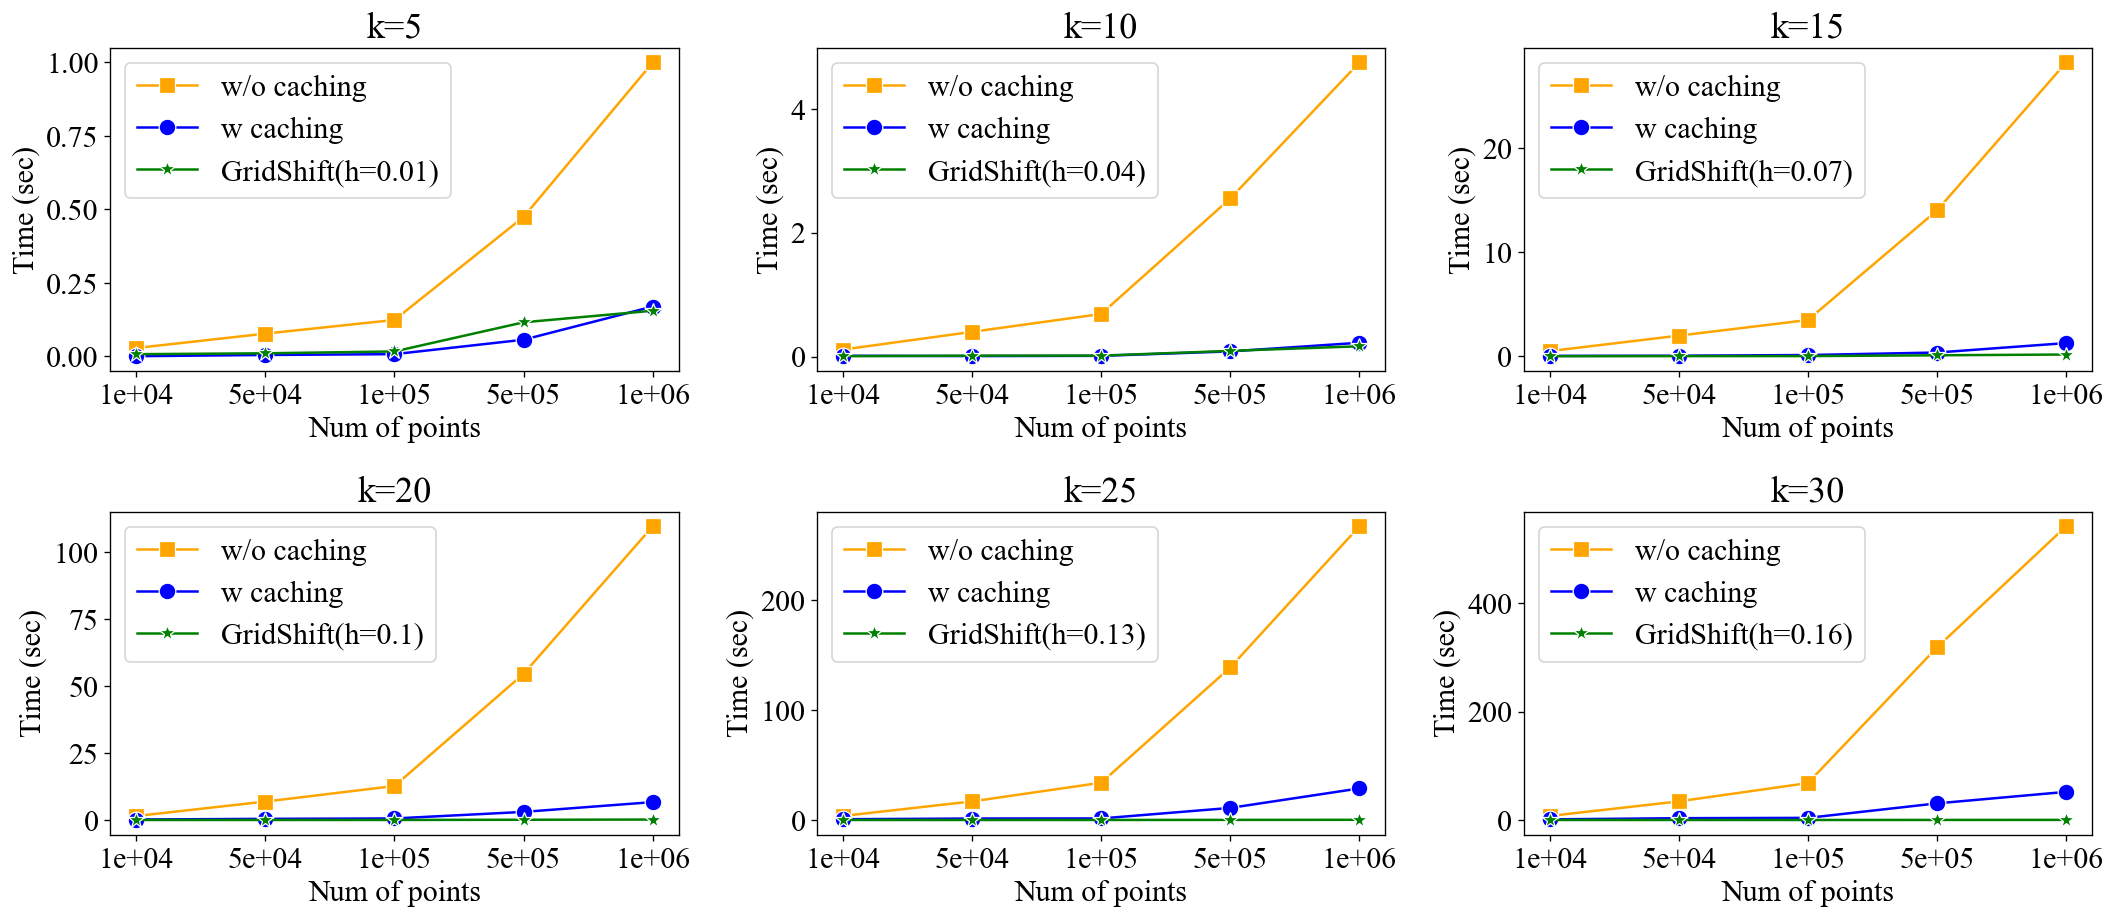

In [12]:
plt.figure(figsize=(18, 8), dpi=120)

plt.subplot(2, 3, 1)
sns.lineplot(x=range(5), y=k5[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k5[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[0], c="green", label="GridShift(h=0.01)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=5")

plt.subplot(2, 3, 2)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
sns.lineplot(x=range(5), y=k10[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k10[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[1], c="green", label="GridShift(h=0.04)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=10")

plt.subplot(2, 3, 3)
plt.xlabel("Num of points")
plt.ylabel("Time (seconds)")
sns.lineplot(x=range(5), y=k15[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k15[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[1], c="green", label="GridShift(h=0.07)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=15")

plt.subplot(2, 3, 4)
plt.xlabel("Num of points")
plt.ylabel("Time (seconds)")
sns.lineplot(x=range(5), y=k20[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k20[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[1], c="green", label="GridShift(h=0.1)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=20")

plt.subplot(2, 3, 5)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
sns.lineplot(x=range(5), y=k25[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k25[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[1], c="green", label="GridShift(h=0.13)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=25")

plt.subplot(2, 3, 6)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
sns.lineplot(x=range(5), y=k30[0], c="orange", label="w/o caching", marker="s", ms=10)
sns.lineplot(x=range(5), y=k30[1], c="blue", label="w caching", marker="o", ms=10)
sns.lineplot(x=range(5), y=data[1], c="green", label="GridShift(h=0.16)", marker='*', ms=10)
plt.xlabel("Num of points")
plt.ylabel("Time (sec)")
plt.xticks(range(5), [f"{n:.0e}" for n in index])
plt.title("k=30")

plt.tight_layout()
plt.savefig("./runtimes2.png")
plt.show()